<a href="https://colab.research.google.com/github/beniamine3155/deep_learning_tensorflow/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X, Y = make_circles(n_samples, noise = 0.03, random_state = 42)



In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
# make dataFrame as features and labels
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label":Y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
# check out the different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

There are two labels one is 0 and another is 1. So, this is a problem of binary classification.

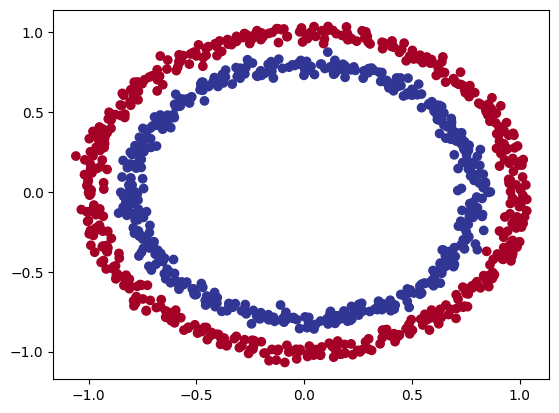

In [8]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap = plt.cm.RdYlBu)

## Input and Output Shapes

In [9]:
X.shape, Y.shape

((1000, 2), (1000,))

In [10]:
# check the how many samples
len(X), len(Y)

(1000, 1000)

In [11]:
# first examples of features and labes
X[0], Y[0]

(array([0.75424625, 0.23148074]), 1)

## Creating a model

In [12]:
# set random seed
tf.random.set_seed(42)

# create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# fit the model
model_1.fit(X, Y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 5s 3ms/step - loss: 6.2313 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.0271 - accuracy: 0.4790
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 5.9391 - accuracy: 0.4820
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 5.4287 - accuracy: 0.4670
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 5.4294 - accuracy: 0.4900


In [13]:
# train our model for longer
model_1.fit(X, Y, epochs = 200, verbose=0)
model_1.evaluate(X, Y)



32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

model_2.fit(X, Y, epochs = 100, verbose=0)

In [15]:
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4720


[0.6934757828712463, 0.47200000286102295]

## Improving the model

In [16]:
# set random seed
tf.random.set_seed(42)

# create a model using Sequential API with 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model using Adam() instead of SGD()
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X, Y, epochs = 100, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 2.5109 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.4370
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.4580
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7231 - accuracy: 0.4520
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7200 - accuracy: 0.4370
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7169 - accuracy: 0.4210
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7140 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.4270
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7091 - accuracy: 0.4500
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.4950
Epoch 11/

In [17]:
import numpy as np

def plot_decision_boundary(model, X, Y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make predictions using the trained model
  y_pred = model.predict(x_in)


  # check for mutli class
  if model.output_shape[-1] > 1:
    print("doing mutliclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
doing binary classification


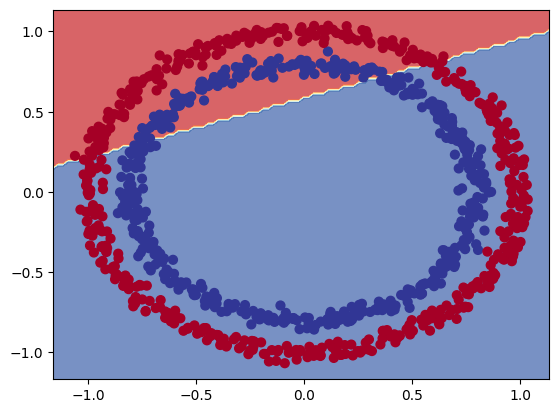

In [18]:
# Check out the predictions of our model
plot_decision_boundary(model_3, X, Y)

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# setup random seed
tf.random.set_seed(42)

# recreate the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# change the loss and metrics , and compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 473.4185 - mae: 473.4185
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 344.4709 - mae: 344.4709
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 221.3550 - mae: 221.3550
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 94.4956 - mae: 94.4956
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 63.6503 - mae: 63.6503
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 93.1920 - mae: 93.1920
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 68.2901 - mae: 68.2901
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 44.1919 - mae: 44.1919
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 50.4709 - mae: 50.4709
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 41.7879 - mae: 41.7879
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


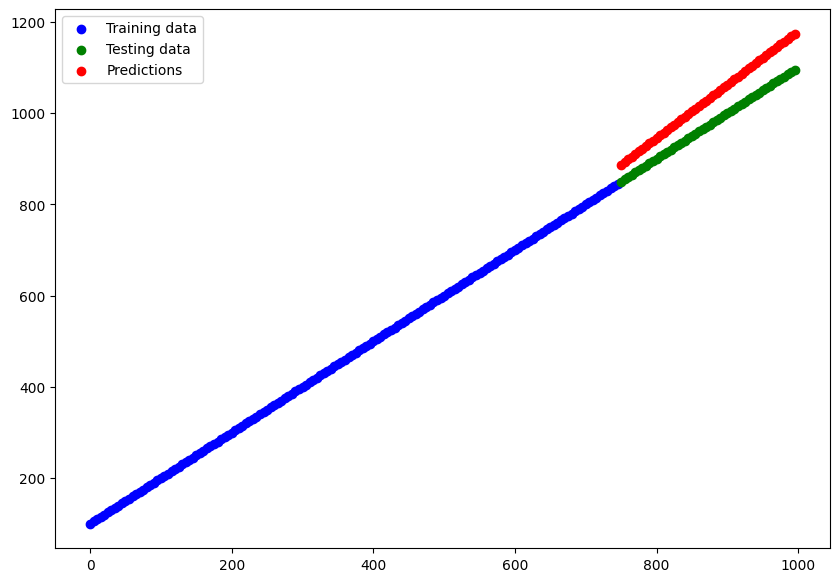

In [22]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

## The missing piece: Non-linearity

In [23]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

history = model_4.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.8988 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.8057 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4809 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4115 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3574 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3103 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2694 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2322 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1992 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1684 - accuracy: 0.5000
Epoch 11/

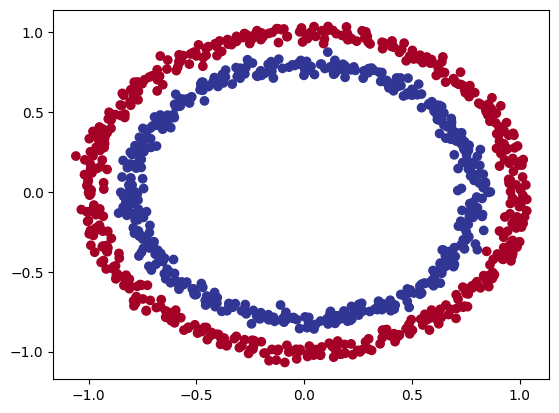

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classification


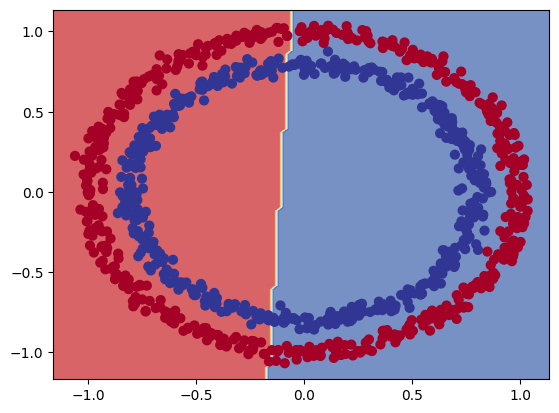

In [25]:
plot_decision_boundary(model_4, X, Y)

In [26]:

# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 2.1426 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5902 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4414 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3149 - accuracy: 0.4500
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1047 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9602 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8695 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7967 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7604 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7419 - accuracy: 0.4920
Epoch 11/

In [28]:
model_6.evaluate(X, Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8300


[0.3852902054786682, 0.8299999833106995]

313/313 [==============================] - 1s 2ms/step
doing binary classification


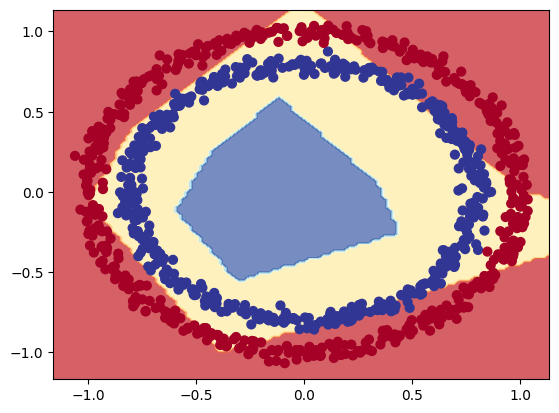

In [29]:
plot_decision_boundary(model_6, X, Y)

In [30]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, Y, epochs=100, verbose=0)

In [31]:
model_7.evaluate(X, Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.8540


[0.44844359159469604, 0.8539999723434448]

313/313 [==============================] - 1s 2ms/step
doing binary classification


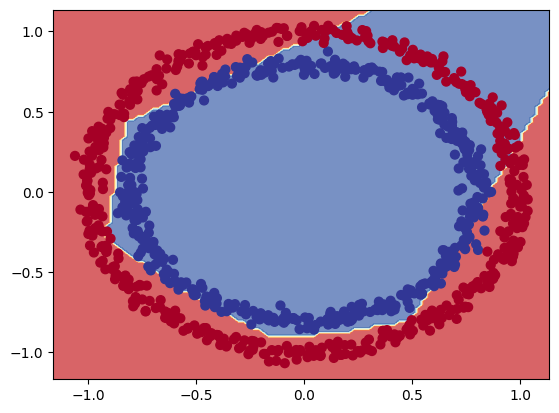

In [32]:
plot_decision_boundary(model_7, X, Y)

In [33]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

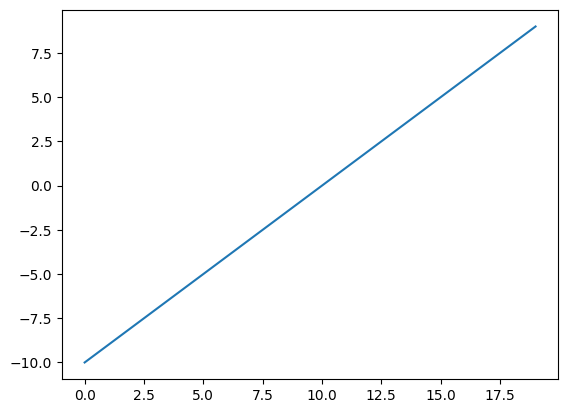

In [34]:
plt.plot(A);

In [35]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

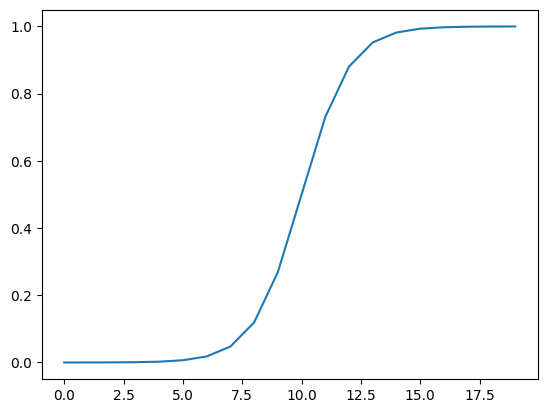

In [36]:
plt.plot(sigmoid(A))

In [37]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

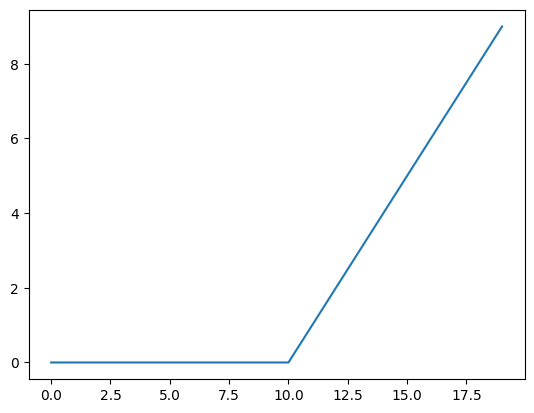

In [38]:
plt.plot(relu(A))

In [39]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [40]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

In [41]:
# How many examples are in the whole dataset?
len(X)

1000

In [42]:
# split data into train and test set
X_train, y_train = X[:800], Y[:800]
X_test, y_test = X[800:], Y[800:]
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [43]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

historoy = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 5ms/step - loss: 0.6846 - accuracy: 0.5725
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5638
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.5700
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6075
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6100
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.6488
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.7175
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7150
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7725
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7937
Epoch 11/25
25/25 [

In [44]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.3473 - accuracy: 0.8750
Model loss on the test set: 0.34726589918136597
Model accuracy on the test set: 87.50%


313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 2ms/step
doing binary classification


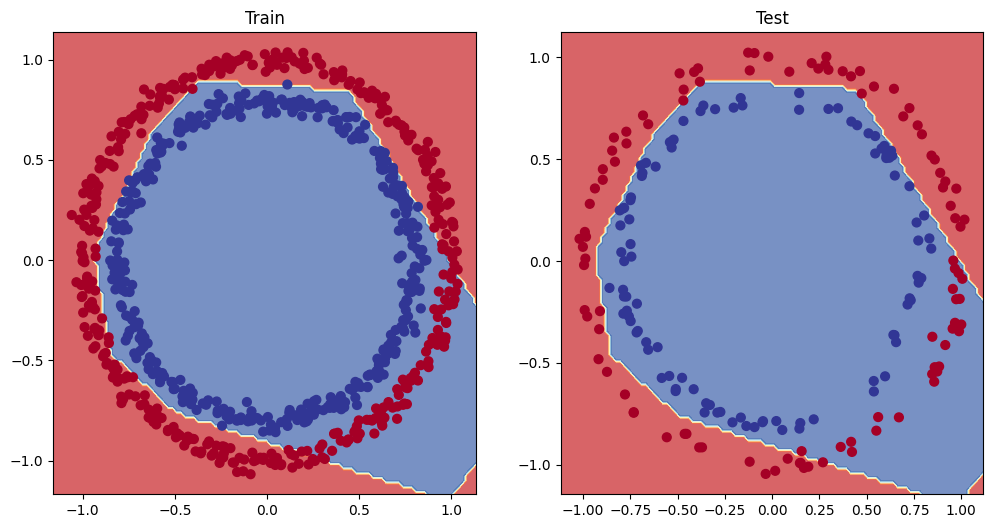

In [46]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, Y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, Y=y_test)
plt.show()

## Plot the loss curves

In [47]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.696996,0.494
1,0.695971,0.498
2,0.695129,0.489
3,0.694510,0.493
4,0.694061,0.493
...,...,...
95,0.465136,0.839
96,0.461741,0.827
97,0.458168,0.843
98,0.455009,0.859


Text(0.5, 1.0, 'Model_8 training curves')

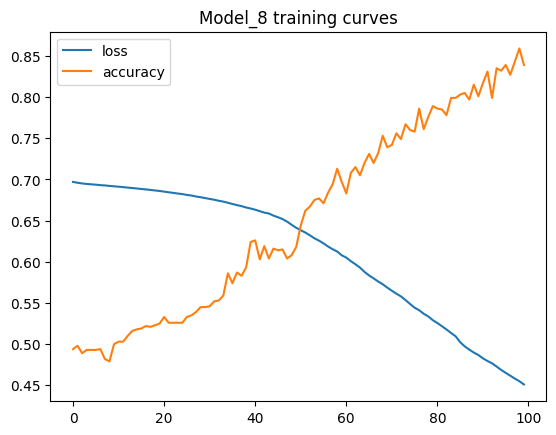

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

## Finding the best learning rate

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 7ms/step - loss: 0.6958 - accuracy: 0.5100 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6957 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5125 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.5125 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5125 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

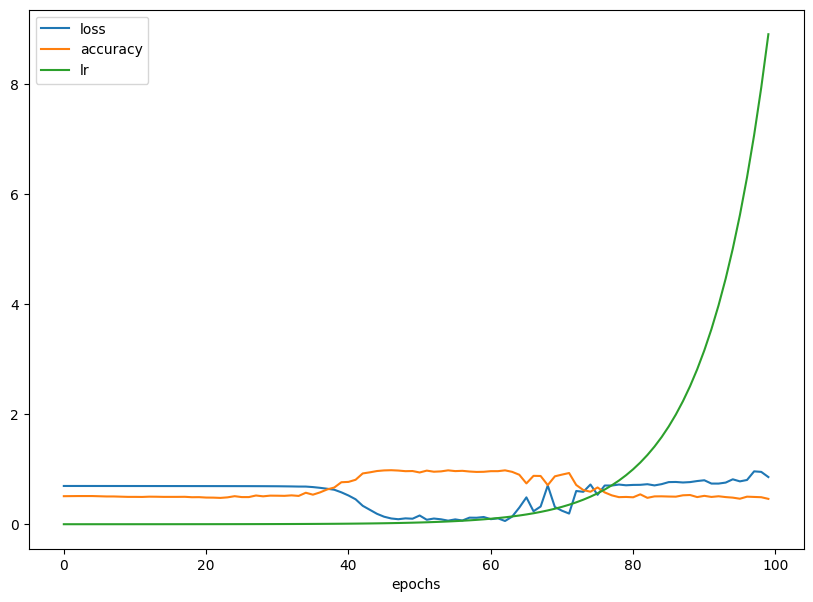

In [50]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

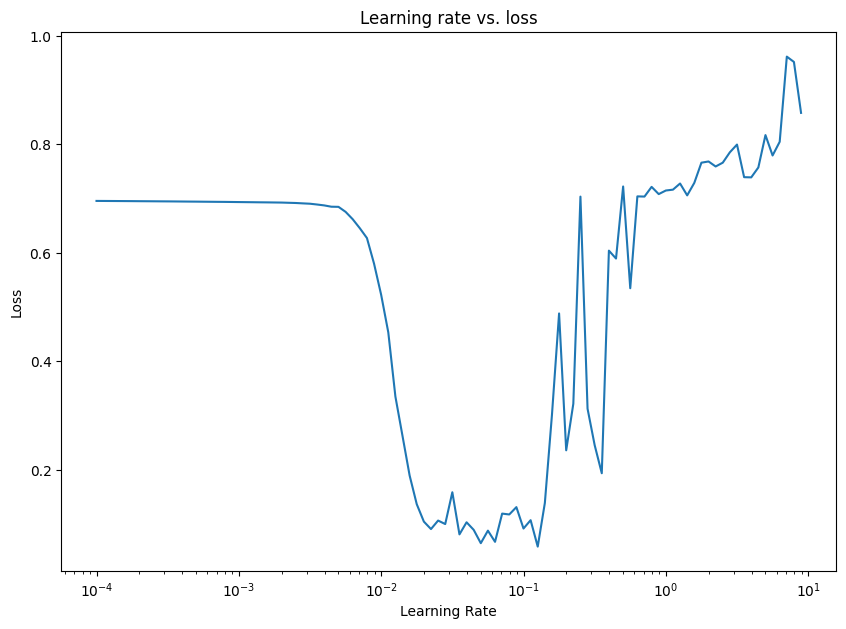

In [51]:

# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [52]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [53]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 3s 5ms/step - loss: 0.7083 - accuracy: 0.4613
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4888
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.4913
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5188
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5913
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6552 - accuracy: 0.5788
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.6475
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.6612
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.6675
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7125
Epoch 11/20
25/25 [

In [54]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1550 - accuracy: 0.9800


[0.1550058126449585, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


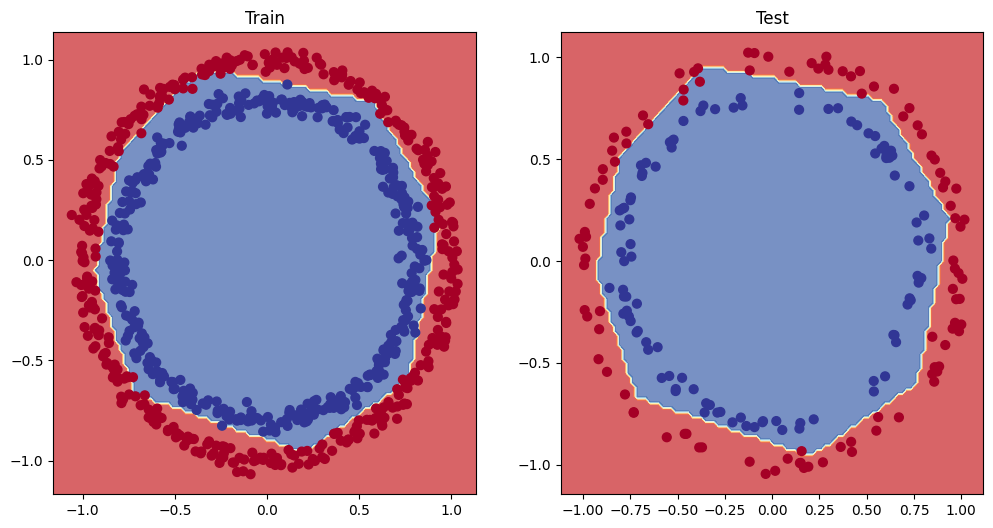

In [55]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, Y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, Y=y_test)
plt.show()

## More classification evaluation methods

In [56]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.1550 - accuracy: 0.9800
Model loss on test set: 0.1550058126449585
Model accuracy on test set: 98.00%


In [57]:

# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [58]:
# View the first 10 predictions
y_preds[:10]

array([[0.8636382 ],
       [0.8636382 ],
       [0.8636382 ],
       [0.8636382 ],
       [0.4236548 ],
       [0.02151823],
       [0.8636382 ],
       [0.32827798],
       [0.8636382 ],
       [0.04643654]], dtype=float32)

In [59]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [60]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [61]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 0, 99]])

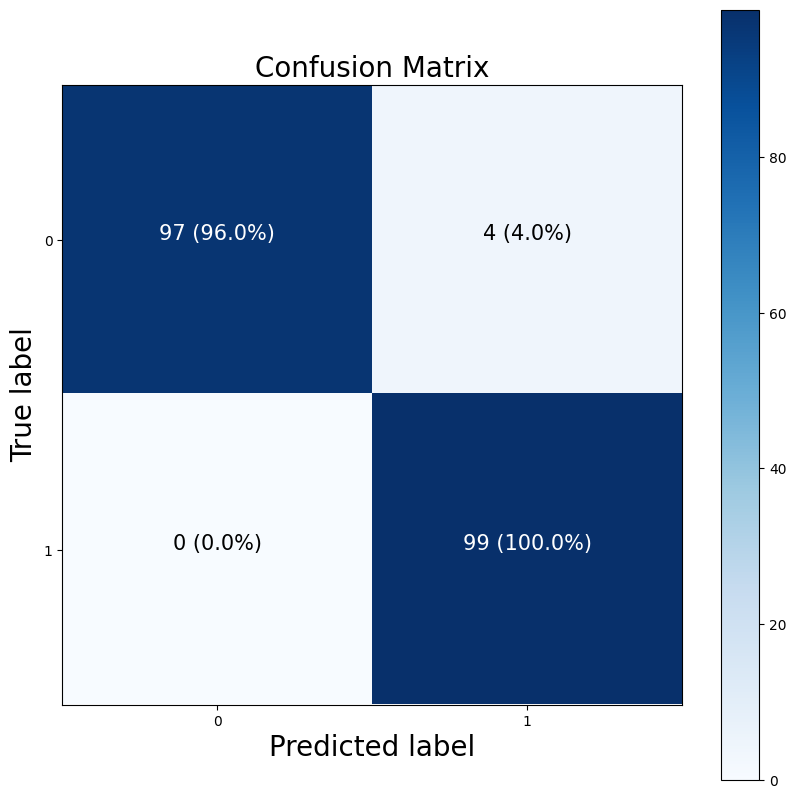

In [62]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


In [63]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


## Working with a larger example (multiclass classification)

In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [66]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [68]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

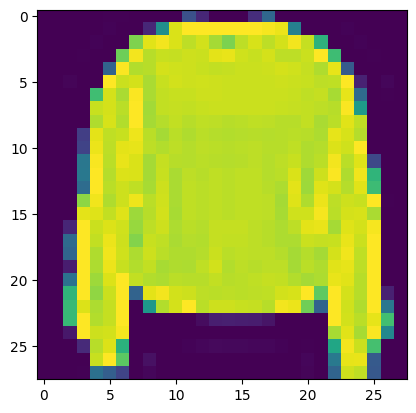

In [69]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [70]:
train_labels[7]

2

In [71]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

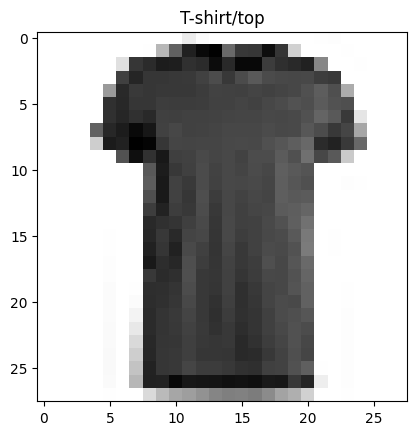

In [72]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

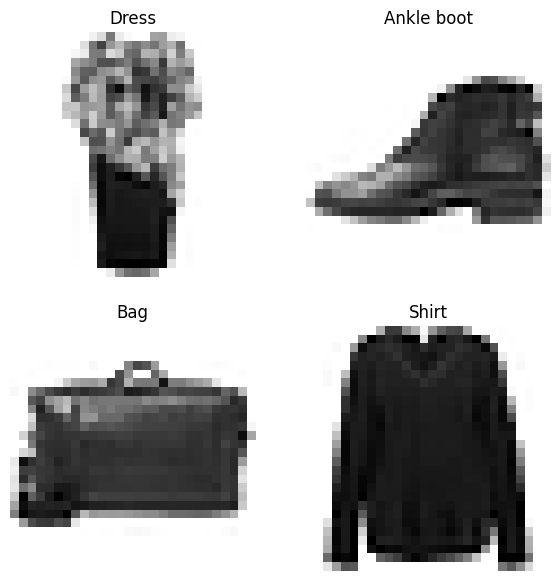

In [73]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [74]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.4449 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3030 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy:

In [75]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [77]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [78]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1333 - accuracy: 0.5837 - val_loss: 0.8172 - val_accuracy: 0.6865
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7410 - accuracy: 0.7351 - val_loss: 0.7188 - val_accuracy: 0.7559
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6654 - accuracy: 0.7721 - val_loss: 0.6714 - val_accuracy: 0.7719
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6216 - accuracy: 0.7866 - val_loss: 0.6328 - val_accuracy: 0.7857
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5966 - accuracy: 0.7967 - val_loss: 0.6246 - val_accuracy: 0.7930
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5801 - accuracy: 0.8015 - val_loss: 0.6073 - val_accuracy: 0.7928
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5696 - accuracy: 0.8057 - val_loss: 0.6077 - val_accuracy:

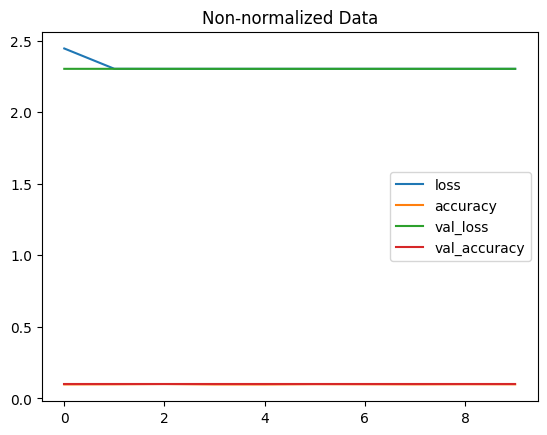

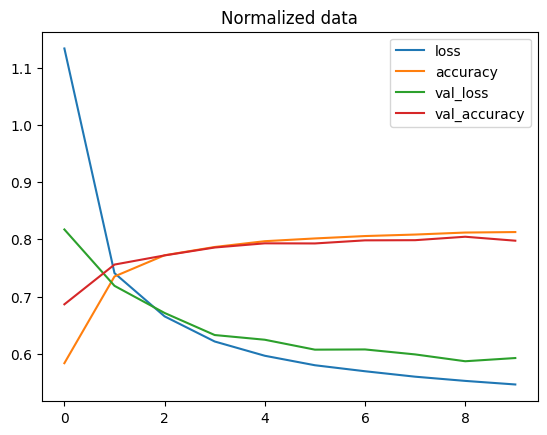

In [79]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1672 - accuracy: 0.5850 - val_loss: 0.7706 - val_accuracy: 0.7331 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6921 - accuracy: 0.7569 - val_loss: 0.6844 - val_accuracy: 0.7511 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6402 - accuracy: 0.7734 - val_loss: 0.6555 - val_accuracy: 0.7637 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6182 - accuracy: 0.7801 - val_loss: 0.6304 - val_accuracy: 0.7764 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6014 - accuracy: 0.7876 - val_loss: 0.6125 - val_accuracy: 0.7851 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5832 - accuracy: 0.7986 - val_loss: 0.6216 - val_accuracy: 0.7904 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

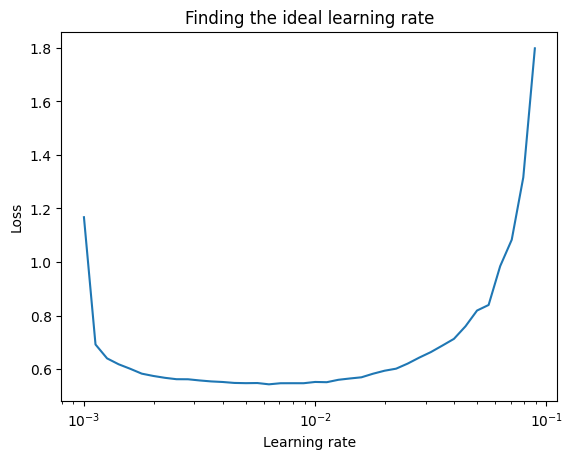

In [81]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [82]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1184 - accuracy: 0.5552 - val_loss: 0.7997 - val_accuracy: 0.6956
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7211 - accuracy: 0.7336 - val_loss: 0.7033 - val_accuracy: 0.7551
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6481 - accuracy: 0.7712 - val_loss: 0.6584 - val_accuracy: 0.7660
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6178 - accuracy: 0.7861 - val_loss: 0.6410 - val_accuracy: 0.7780
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6025 - accuracy: 0.7891 - val_loss: 0.6295 - val_accuracy: 0.7796
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5918 - accuracy: 0.7939 - val_loss: 0.6684 - val_accuracy: 0.7591
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5857 - accuracy: 0.7956 - val_loss: 0.6394 - val_accuracy:

In [83]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)



In [84]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[7.8279086e-08, 8.2026594e-07, 2.1178279e-08, 2.3260550e-11,
        2.6808095e-07, 4.1136774e-01, 5.9146057e-08, 7.7464953e-02,
        1.5473319e-04, 5.1101130e-01],
       [7.4380275e-04, 7.4883297e-07, 6.4163637e-01, 2.0554235e-05,
        6.1908361e-02, 1.2022034e-19, 2.9568687e-01, 0.0000000e+00,
        3.2086587e-06, 1.9508070e-30],
       [8.0660066e-06, 9.9917608e-01, 1.6931552e-04, 1.7088972e-04,
        6.3471773e-05, 3.6500335e-08, 7.1149913e-07, 6.7213974e-15,
        1.3998128e-10, 4.1141044e-04],
       [1.1373583e-07, 9.9992573e-01, 6.0566217e-06, 2.5052101e-05,
        6.0309009e-07, 1.5531260e-11, 1.8521827e-09, 1.4692602e-17,
        4.6407499e-15, 4.2472810e-05],
       [1.0401405e-01, 4.3309602e-04, 1.8774003e-01, 2.4592670e-02,
        8.1747763e-02, 3.3401140e-08, 5.9807682e-01, 5.6286040e-30,
        3.3955509e-03, 1.0991115e-14]], dtype=float32)

In [85]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [86]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [87]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[733,   2,   3, 110,   7,   2, 124,   0,  18,   1],
       [  1, 941,   6,  37,  10,   1,   1,   0,   1,   2],
       [ 14,   3, 465,  40, 281,   0, 192,   0,   5,   0],
       [ 39,  26,   9, 838,  27,   3,  52,   0,   5,   1],
       [  0,  12,  53,  31, 804,   1,  91,   0,   8,   0],
       [  0,   0,   0,   0,   0, 866,   0,  77,   6,  51],
       [147,   1,  50,  68, 176,   3, 515,   0,  39,   1],
       [  0,   0,   0,   0,   0,  24,   0, 932,   0,  44],
       [  0,   1,   0,  13,   9,  35,  39,   3, 900,   0],
       [  0,   1,   0,   0,   0,  27,   0,  55,   1, 916]])

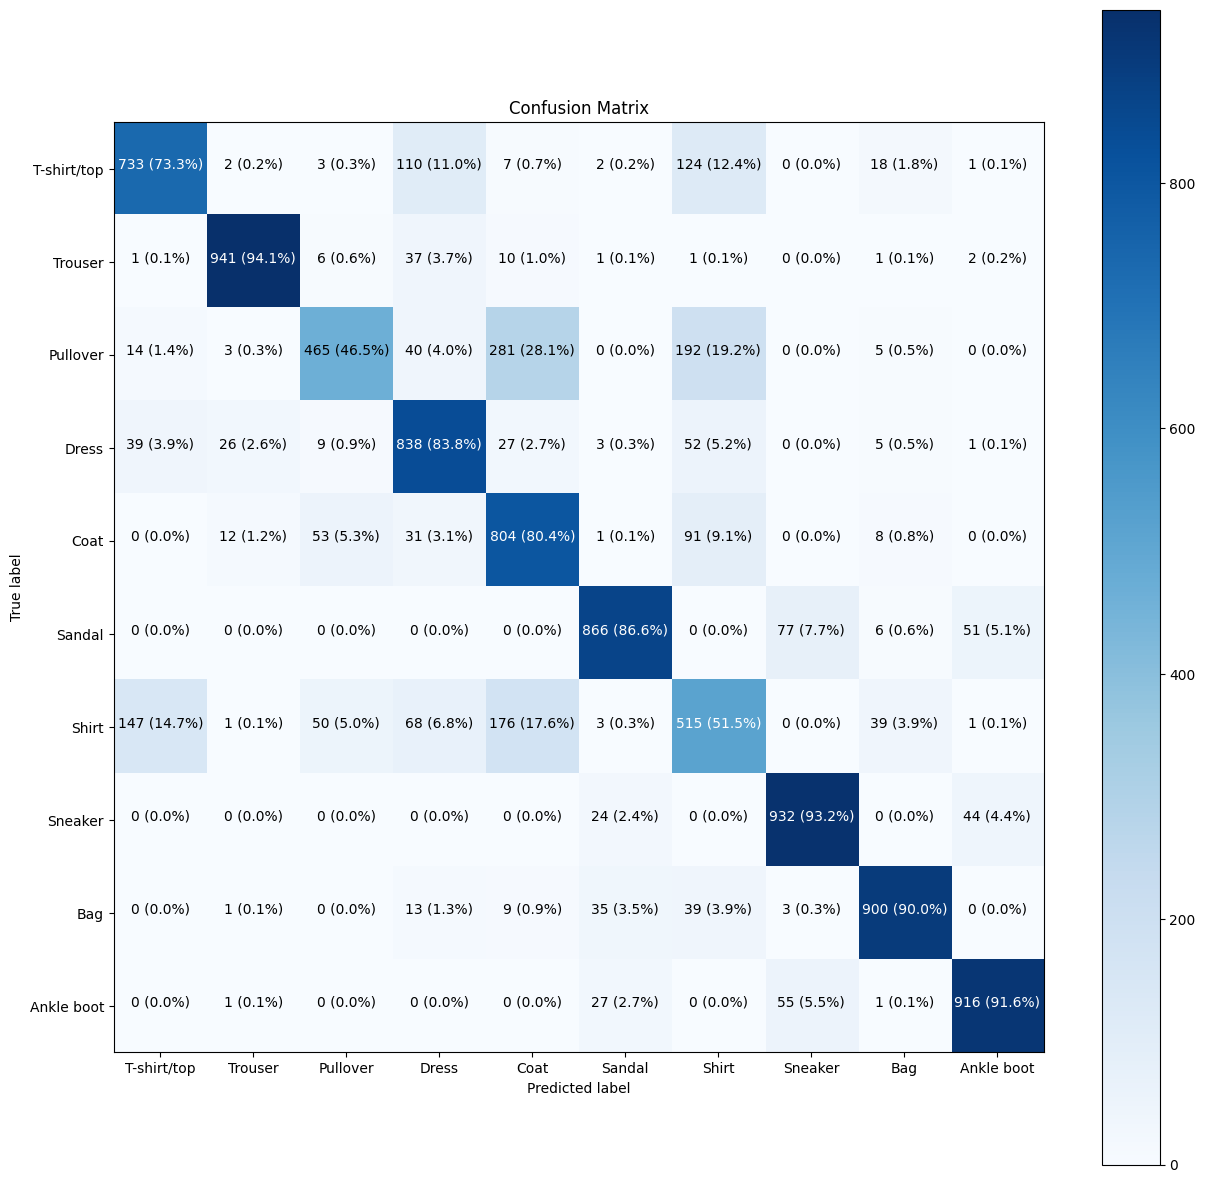

In [88]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [89]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):

  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red



1/1 [==============================] - 0s 25ms/step


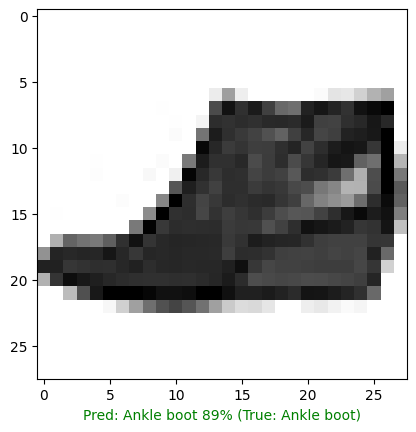

In [90]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [91]:
model_14.layers

In [92]:
model_14.layers[1]

In [93]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape


(array([[ 0.00352699, -0.13668887,  0.44272906, -0.7028617 ],
        [ 0.04994085, -0.45262426,  0.35376376, -0.5477261 ],
        [ 0.0012154 , -0.2712238 ,  0.74271655, -1.0253552 ],
        ...,
        [ 0.03950522,  0.05295444,  0.61939   ,  0.09294685],
        [-0.06971853, -0.0810497 ,  0.13697405,  0.78170323],
        [ 0.08562788,  0.1268645 ,  0.95679474, -0.605096  ]],
       dtype=float32),
 (784, 4))

In [94]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-0.0370735 ,  1.077007  ,  1.5710009 ,  0.45300883], dtype=float32),
 (4,))

In [95]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


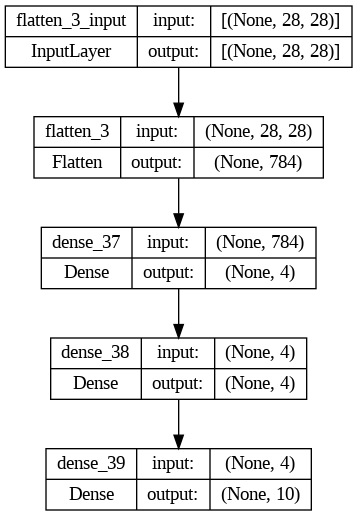

In [96]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)